<a href="https://colab.research.google.com/github/PhimWi/Steam-mini-project/blob/main/Steam_Games_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Steam Games Dataset Analysis**

Steam Games Dataset เป็นข้อมูลที่เกี่ยวกับเกมในแพลตฟอร์มที่มีชื่อว่า “Steam” ซึ่งเป็นแพลตฟอร์มสำหรับรวบรวมและจัดจำหน่ายเกมดิจิทัลที่เป็นที่นิยมเป็นอย่างมาก โดยหวังว่าการวิเคราะห์จะทำให้เกิดความเข้าใจต่อแนวโน้มและปัจจัยต่าง ๆ ที่มีผลต่อยอดขายและความนิยมของเกมได้มากยิ่งขึ้น



---



# **1. Data & Package**

ก่อนเริ่มการวิเคราะห์ได้ทำการติดตั้ง library เพื่อใช้ในการจัดการ วิเคราะห์ และนำเสนอข้อมูล โดยได้ทำการนำเข้าข้อมูลมาจาก kaggle ซึ่ง library ที่เลือกใช้เป็นหลักนั้น ได้แก่ Pandas, NumPy, Opendatasets, Matplotlib และ Seaborn เนื่องจากข้อมูลที่ได้มานั้นเป็น Structure Data

In [1]:
# Import library
!pip install opendatasets
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns

***opendatasets*** เป็น library ของ python เพื่อใช้โหลดชุดข้อมูลจาก Kaggle

*   install โดยใช้ !pip install
*   import opendatasets as od
*   your_dataset_url = '...'
*   od.download(your_dataset_url)
*   ให้ทำการล็อคอินเข้า Kaggle Account https://kaggle.com/me/account เพื่อ create new API Token ภายใต้ API section
*   จะมีไฟล์ kaggle.json ให้นำ username & key ที่ได้รับมาใส่ตอนรัน  od.download

In [2]:
# Import dataset from Kaggle
od.download(
    "https://www.kaggle.com/datasets/fronkongames/steam-games-dataset")
df_steam = pd.read_csv('/content/steam-games-dataset/games.csv')
print( f"\n\nRows\n\n{df_steam.index=}" )
print( f"\n\nColumns\n\n{df_steam.columns=}" )

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: phimwib
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/fronkongames/steam-games-dataset


100%|██████████| 211M/211M [00:03<00:00, 62.5MB/s]





Rows

df_steam.index=Index([  20200,  655370, 1732930, 1355720, 1139950, 1469160, 1659180, 1968760,
       1178150,  320150,
       ...
       3148680, 2435240, 2214970, 3165130, 3199580, 3080940, 2593970, 3137150,
       3124670, 3054200],
      dtype='int64', length=97410)


Columns

df_steam.columns=Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DiscountDLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')


เมื่อทำการนำเข้าข้อมูล จะเห็นได้ว่าข้อมูลชุดนี้มีทั้งหมด 97,410 แถว และมีทั้งหมด 39 คอลัมน์ โดยรายละเอียดแต่ละคอลัมน์มีดังต่อไปนี้
1. AppID = รหัสประจำตัวของเกมใน Steam
2. Name = ชื่อของเกม
3. Release date = วันที่เกมถูกเปิดตัว
4. Estimated owners = ค่าประมาณจำนวนผู้ที่เป็นเจ้าของเกม
5. Peak CCU = จำนวนผู้เล่นพร้อมกันสูงสุด
6. Required age = อายุขั้นต่ำที่อนุญาตให้เล่นเกม
7. Price = ราคาของเกม
8. DiscountDLC count = จำนวน DLC ที่ลดราคา
9. About the game = คำอธิบายสั้น ๆ เกี่ยวกับเกม
10. Supported languages = ภาษาที่เกมรองรับ
11. Full audio languages = ภาษาที่รองรับเสียงพากย์เต็มรูปแบบ
12. Reviews = ความคิดเห็นจากผู้เล่นหรือเว็บไซต์
14. Website = เว็บไซต์ของเกม
15. Support url = ลิงก์สำหรับการสนับสนุนเกม
16. Support email = อีเมลสำหรับการติดต่อสนับสนุน
17. Windows = เกมรองรับบน Windows
18. Mac = เกมรองรับบน Mac
19. Linux = เกมรองรับบน Linux
20. Metacritic score = คะแนนจากเว็บไซต์ Metacritic
21. Metacritic url = ลิงก์ไปยังหน้า Metacritic ของเกม
22. User score = คะแนนที่ผู้ใช้งานให้เกม
23. Positive = คะแนนโหวตเชิงบวก
24. Negative = คะแนนโหวตเชิงลบ
25. Score rank = อันดับของเกมตามคะแนน
26. Achievements = จำนวนความสำเร็จที่ผู้เล่นสามารถปลดล็อกได้ในเกม
27. Recommendations = จำนวนคำแนะนำเกมจากผู้เล่น
28. Notes = ข้อมูลเพิ่มเติม
29. Average playtime forever = เวลาเล่นเฉลี่ยตั้งแต่เกมออก
30. Average playtime two weeks = เวลาเล่นเฉลี่ยในช่วง 2 สัปดาห์ที่ผ่านมา
31. Median playtime forever = เวลาเล่นกลางใตั้งแต่เกมออก
32. Median playtime two weeks = เวลาเล่นกลางในช่วง 2 สัปดาห์ที่ผ่านมา
33. Developers = ชื่อผู้พัฒนาเกม
34. Publishers = ชื่อผู้จัดจำหน่ายเกม
35. Categories = ประเภทหรือหมวดหมู่ของเกม (เช่น Single-player, Multi-player)
36. Genres = แนวของเกม (เช่น Action, Adventure)
37. Tags = แท็กหรือคำสำคัญที่เกี่ยวกับเกม
38. Screenshots = ภาพหน้าจอของเกม
39. Movies = วิดีโอหรือคลิปเกี่ยวกับเกม



---



# **2. Cleansing Data**

จากข้อมูลที่ได้มานั้น พบว่าข้อมูลอยู่ในรูปแบบที่ไม่สมบูรณ์ จึงได้มีการปรับปรุงและแก้ไขข้อมูลเพื่อให้ง่ายต่อการวิเคราะห์มากยิ่งขึ้น โดยได้แก้ไขส่วนต่าง ๆ  ดังต่อไปนี้

## **2.1 Renaming Columns**




จากการตรวจสอบพบว่า คอลัมน์ 'Name' ไม่ใช่ค่าจริงในคอลัมน์นี้ จึงได้ทำการลบคอลัมน์ทิ้ง อีกทั้งชื่อคอลัมน์ใน 7 คอลัมน์แรกมีการเลื่อน ทำให้ข้อมูลในแต่ละคอลัมน์ไม่ตรงกับชื่อที่ควรจะเป็น ดังนั้นจึงมีการแก้ไขชื่อคอลัมน์เพื่อให้ข้อมูลสอดคล้องกับชื่อคอลัมน์ที่ถูกต้อง นอกจากนี้ยังมีการปรับชื่อคอลัมน์บางส่วนเล็กน้อย เพื่อให้ง่ายต่อการนำไปวิเคราะห์ และได้กำหนดให้คอลัมน์ 'Name' เป็นดัชนีหลักของตารางนี้อีกด้วย

In [52]:
# Renaming Columns
df = df_steam.drop('Price', axis=1)
df_re = df.rename(columns = {'AppID':'Name', 'Name':'Release_date', 'Release date':'owners', 'Estimated owners':'Peak_CCU', 'Peak CCU':'required_age', 'Required age':'Price',
                              'Metacritic score':'Metacritic_score', 'Average playtime forever':'Avg_playtime', 'Median playtime forever':'Median_playtime'})
df_re.set_index('Name', inplace=True)

In [53]:
# Before Rename
df_steam.head(3)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [54]:
# After Rename
df_re.head(3)

,Release_date,owners,Peak_CCU,required_age,Price,DiscountDLC count,About the game,Supported languages,Full audio languages,Reviews,...,Average playtime two weeks,Median_playtime,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
Name,,,,,,,,,,,,,,,,,,,,,
Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


## **2.2 Dropping Unused Columns**

เมื่อพิจารณาถึงความต้องการในการวิเคราะห์ พบว่าบางคอลัมน์นั้นไม่มีความจำเป็นที่จะต้องใช้ในการวิเคราะห์ครั้งนี้ จึงได้ทำการลบคอลัมน์เหล่านั้นออกไป

In [55]:
# Dropping Unused Columns
df = df_re.drop(['required_age','DiscountDLC count', 'About the game','Supported languages', 'Full audio languages',
                 'Header image', 'Website', 'Support url', 'Support email','User score', 'Metacritic url', 'Score rank',
                 'Achievements','Notes', 'Average playtime two weeks', 'Median playtime two weeks','Tags', 'Screenshots', 'Movies'], axis = 1)

## **2.3 Missing Value**

เมื่อลองตรวจสอบข้อมูลที่หายไป พบว่าคอลัมน์ที่มีข้อมูลที่หายไปมีทั้งหมด 5 คอลัมน์ด้วยกัน ได้แก่ คอลัมน์ 'Reviews',  'Developers', 'Publishers', 'Categories' และ 'Genres'

In [56]:
# Check Missing Values
df.isna().sum()

,0
Release_date,0
owners,0
Peak_CCU,0
Price,0
Reviews,87285
Windows,0
Mac,0
Linux,0
Metacritic_score,0
Positive,0


In [57]:
# Percent Of Missing Values
print(f"Percent of missing Reviews = {df['Reviews'].isnull().sum()/df.shape[0]*100:.2f}%")
print(f"Percent of missing Developers = {df['Developers'].isnull().sum()/df.shape[0]*100:.2f}%")
print(f"Percent of missing Publishers = {df['Publishers'].isnull().sum()/df.shape[0]*100:.2f}%")
print(f"Percent of missing Categories = {df['Categories'].isnull().sum()/df.shape[0]*100:.2f}%")
print(f"Percent of missing Genres = {df['Genres'].isnull().sum()/df.shape[0]*100:.2f}%")

Percent of missing Reviews = 89.61%
Percent of missing Developers = 5.01%
Percent of missing Publishers = 5.31%
Percent of missing Categories = 6.07%
Percent of missing Genres = 4.97%


เมื่อทำการตรวจสอบอัตราส่วนของข้อมูลที่หายไป พบว่าคอลัมน์ 'Reviews' มีอัตราส่วนถึง 89.61 ซึ่งถือว่าสูงมาก จึงได้ตัดสินใจลบคอลัมน์ 'Reviews' ออก
ในขณะที่คอลัมน์ 'Developers', 'Publishers', 'Categories' และ 'Genres'
มีอัตราส่วนของข้อมูลที่หายไปไม่ถึง 1 ใน 10 ของข้อมูลทั้งหมด จึงเลือกที่จะเก็บคอลัมน์เหล่านี้ไว้และแทนค่าข้อมูลที่หายไปด้วยคำว่า unknown

In [58]:
d1 = df.drop('Reviews', axis = 1)

In [59]:
d1['Developers'].fillna('unknown', inplace=True)
d1['Publishers'].fillna('unknown', inplace=True)
d1['Categories'].fillna('unknown', inplace=True)
d1['Genres'].fillna('unknown', inplace=True)

<ipython-input-59-dea2d4573bc5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d1['Developers'].fillna('unknown', inplace=True)
<ipython-input-59-dea2d4573bc5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

## **2.4 Converting formats**

เนื่องจากข้อมูลในคอลัมน์ 'Avg_playtime' และ 'Median_playtime' ถูกบันทึกในหน่วยนาที ซึ่งอาจทำให้การอ่านค่อนข้างยาก จึงได้ทำการแปลงหน่วยจากนาทีเป็นชั่วโมงเพื่อลดจำนวนตัวเลขให้อ่านง่ายขึ้น นอกจากนี้ คอลัมน์ 'Release_date' ที่มีรูปแบบเป็น object ได้ถูกปรับให้อยู่ในรูปแบบวันที่ และได้สร้างคอลัมน์ 'Year' เพิ่มขึ้นมาเพื่ออำนวยความสะดวกในการวิเคราะห์ข้อมูลเพิ่มเติม

In [67]:
# Convert Minutes To Hours
def minutes_to_hours(minutes:int):
    hours = (minutes) // 60      # Integer division to get hours
    return hours

d1['Avg_playtime'] = d1['Avg_playtime'].apply(minutes_to_hours)
d1['Median_playtime'] = d1['Median_playtime'].apply(minutes_to_hours)

In [68]:
# Converting Type
d1['Release_date'] = pd.to_datetime(d1['Release_date'], errors='coerce')
d1['Year'] = d1['Release_date'].dt.year
d1['Year'] = d1['Year'].astype('Int64')

สุดท้ายแล้วข้อมูลจะมีคอลัมน์ทั้งหมด 18 คอลัมน์ และข้อมูลที่ได้ทำการเปลี่ยนรูปแบบเป็นดังต่อไปนี้

In [69]:
# Show data info
d1.info()
d1.loc[:, ['Avg_playtime','Median_playtime', 'Year']].sort_values(by=['Avg_playtime'], ascending=False)

<class 'pandas.core.frame.DataFrame'>
Index: 97410 entries, Galactic Bowling to Lober Lobe
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Release_date      97279 non-null  datetime64[ns]
 1   owners            97410 non-null  object        
 2   Peak_CCU          97410 non-null  int64         
 3   Price             97410 non-null  float64       
 4   Windows           97410 non-null  bool          
 5   Mac               97410 non-null  bool          
 6   Linux             97410 non-null  bool          
 7   Metacritic_score  97410 non-null  int64         
 8   Positive          97410 non-null  int64         
 9   Negative          97410 non-null  int64         
 10  Recommendations   97410 non-null  int64         
 11  Avg_playtime      97410 non-null  int64         
 12  Median_playtime   97410 non-null  int64         
 13  Developers        97410 non-null  object        
 14  Publish

,Avg_playtime,Median_playtime,Year
Name,,,
Boom 3D,40,40,2019
Energy Engine PC Live Wallpaper,28,57,2019
副作用之瞳-Tlicolity Eyes-,25,25,2021
Defense Clicker,21,21,2017
YoloMouse,18,31,2020
...,...,...,...
SpookyKillers: Chapter 1,0,0,2021
Train Simulator: East Coast Main Line London-Peterborough Route Add-On,0,0,2013
Illegal Race Tuning,0,0,2020




---



# **3. Data Exploratory**

หลังจาก cleansing ข้อมูล ได้ทำการสำรวจและวิเคราะห์เพื่อค้นหาความน่าสนใจของข้อมูล รวมไปถึงตรวจสอบลักษณะและโครงสร้างของข้อมูลที่ได้รับการปรับปรุง ซึ่งการดำเนินการในส่วนนี้จะช่วยให้มองเห็นทิศทาง แนวโน้ม และความสัมพันธ์ของข้อมูลมากยิ่งขึ้น

## **3.1 Categories**

อย่างแรกได้ทำการแบ่ง categories ของเกมว่า categories ไหนมีจำนวนเกมมากที่สุด 10 อันดับแรก พบว่า 'Single-player' มีจำนวนเกมมากที่สุด โดยมีจำนวนเกมถึง 86,889 เกม มากกว่าอันดับที่ 2 อย่าง 'Steam Achievments' 110.72% ด้วยกัน

In [70]:
# Sort 'Categories" Column
d1['Categories'].str.get_dummies(',')
d1 = pd.concat([d1, d1['Categories'].str.get_dummies(',')], axis=1)
d1 = d1.loc[:,~d1.columns.duplicated()]

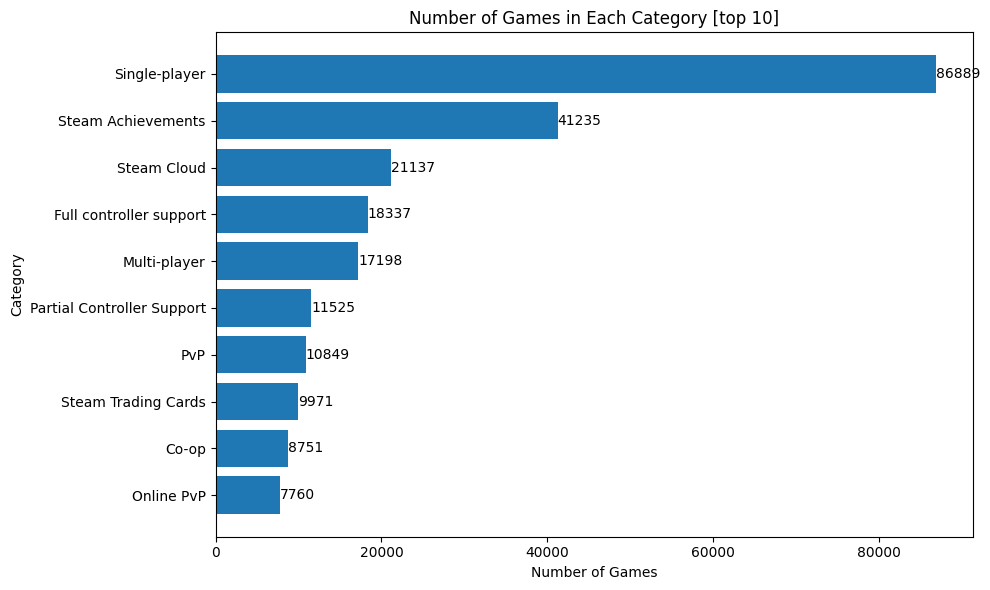

In [71]:
list_category = ['Captions available', 'Co-op',
       'Commentary available', 'Cross-Platform Multiplayer', 'Family Sharing',
       'Full controller support', 'HDR available', 'In-App Purchases',
       'Includes Source SDK', 'Includes level editor', 'LAN Co-op', 'LAN PvP',
       'MMO', 'Mods', 'Mods (require HL2)', 'Multi-player', 'Online Co-op',
       'Online PvP', 'Partial Controller Support', 'PvP',
       'Remote Play Together', 'Remote Play on Phone', 'Remote Play on TV',
       'Remote Play on Tablet', 'Shared/Split Screen',
       'Shared/Split Screen Co-op', 'Shared/Split Screen PvP', 'Single-player',
       'Stats', 'Steam Achievements', 'Steam Cloud', 'Steam Leaderboards',
       'Steam Timeline', 'Steam Trading Cards', 'Steam Turn Notifications',
       'Steam Workshop', 'SteamVR Collectibles', 'Tracked Controller Support',
       'Tracked Motion Controller Support', 'VR Only', 'VR Supported', 'Valve Anti-Cheat enabled']

## create horizontal bar chart
n_games_category = d1[list_category].sum().sort_values(ascending=True) # Sort ascending for horizontal bars
n_games_category = n_games_category.to_frame(name='n_games_category')
n_games_category = n_games_category.tail(10) # Get the top 10
#print(d1.shape[0])

plt.figure(figsize=(10, 6))
plt.barh(n_games_category.index, n_games_category['n_games_category'].values)
plt.xticks(rotation=0)
plt.ylabel("Category")
plt.xlabel("Number of Games")
plt.title("Number of Games in Each Category [top 10]")

# Add labels to each bar
for i, v in enumerate(n_games_category['n_games_category'].values):
    plt.text(v, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

เมื่อทำการดูแนวโน้มของ categories ในช่วง 10 ปีที่ผ่านมา พบว่า 'Single-player' มีจำนวนเกมที่มากที่สุด ซึ่งสอดคล้องกันกับกราฟด้านบน และมีแนวโน้มที่เพิ่มขึ้นเรื่อย ๆ

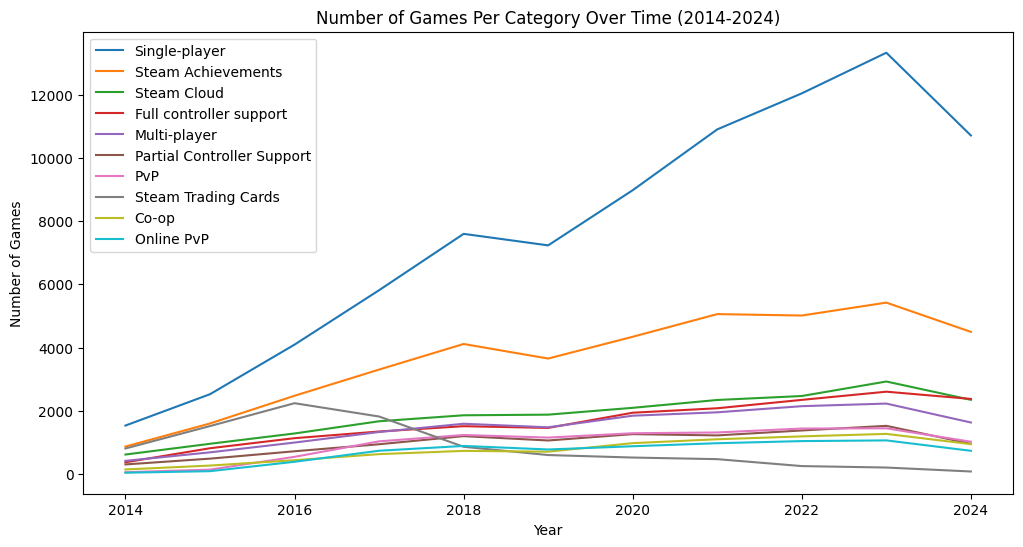

In [72]:
filtered_df = d1[(d1['Year'] >= 2014) & (d1['Year'] <= 2024)]

# Group by year and sum the occurrences of each category
category_counts_by_year = filtered_df.groupby('Year')[list_category].sum()

# Get the top 10 categories
top_10_categories = category_counts_by_year.sum().sort_values(ascending=False).head(10).index

plt.figure(figsize=(12, 6))
for category in top_10_categories:
    plt.plot(category_counts_by_year.index, category_counts_by_year[category], label=category)
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.title("Number of Games Per Category Over Time (2014-2024)")
plt.legend(top_10_categories)

plt.show()

เมื่อทำการวิเคราะห์จำนวนการเป็นเจ้าของเกมตาม categories พบว่า 'Single-player' ยังคงเป็นหมวดหมู่ที่มีจำนวนเกมและการครอบครองสูงที่สุด โดยมียอดการซื้อสะสมสูงถึง 5.89 พันล้านครั้ง

In [100]:
def convert_range_to_midpoint(value):
    try:
        # Attempt to convert directly to float if already numeric
        return float(value)
    except ValueError:
        # If ValueError, assume it's a range and calculate midpoint
        if isinstance(value, str) and '-' in value:
            min_val, max_val = map(float, value.split('-'))
            return (min_val + max_val) / 2
        else:
            # If not a recognizable range, return NaN
            return float('nan')

# Apply the conversion to 'owners' columns
d1['owners'] = d1['owners'].apply(convert_range_to_midpoint)

In [74]:
# Reshape the DataFrame using melt
melted_df = pd.melt(d1,
                    id_vars=['Year', 'owners'],
                    value_vars=list_category,
                    var_name='Category',
                    value_name='Value')
# Filter where 'Value' is 1 and group by categories, then sum owners
owner_sum = melted_df[melted_df['Value'] == 1].groupby('Category')['owners'].sum()
owner_sum.sort_values(ascending=False).head(10)

# หน่วยของ owners เป็นพันล้านคน

,owners
Category,
Single-player,5.890750e+09
Steam Achievements,4.837645e+09
Multi-player,4.253550e+09
Steam Trading Cards,3.628810e+09
Steam Cloud,3.105970e+09
Full controller support,2.694020e+09
Co-op,2.653190e+09
PvP,2.353730e+09
Online PvP,2.263815e+09


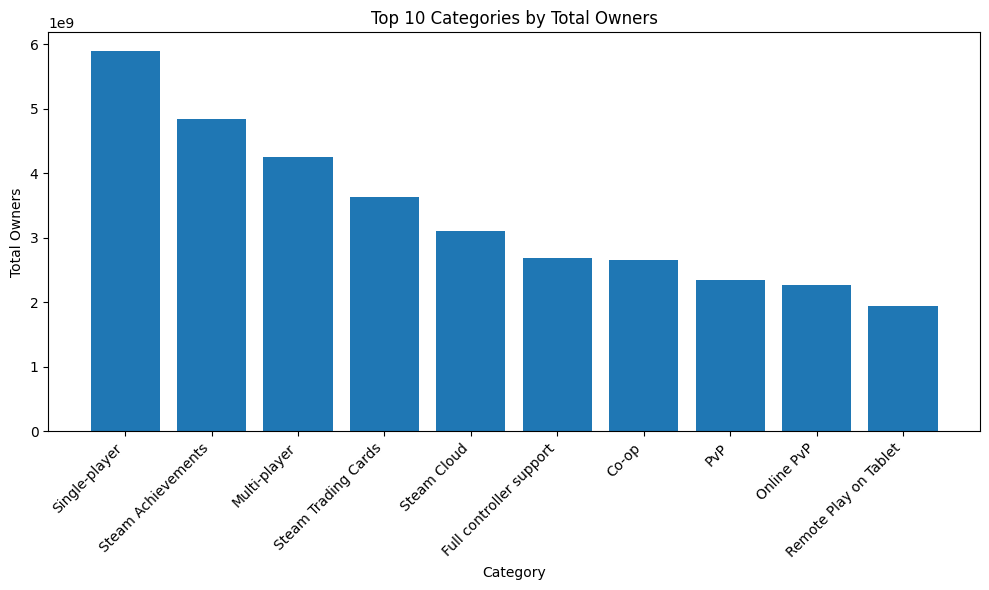

In [75]:
top10_owner_category = owner_sum.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top10_owner_category.index, top10_owner_category.values)
plt.xlabel("Category")
plt.ylabel("Total Owners")
plt.title("Top 10 Categories by Total Owners")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **3.2 Genres**

ต่อมาได้ทำการแบ่ง genres ของเกมว่า genres ไหนมีจำนวนมากที่สุด 10 อันดับแรก พบว่า 'Indie' มีจำนวนเกมมากที่สุด โดยมีจำนวนเกมอยู่ที่ 64,501 เกม มากกว่าอันดับที่ 2 อย่าง 'Casual' 64.09% ด้วยกัน

In [76]:
d1 = pd.concat([d1, d1['Genres'].str.get_dummies(',')], axis=1)
d1 = d1.loc[:,~d1.columns.duplicated()]
d1.drop('Free to Play', axis=1, inplace=True)
d1.drop('unknown', axis=1, inplace=True)
d1.drop('VR Support', axis=1, inplace=True)

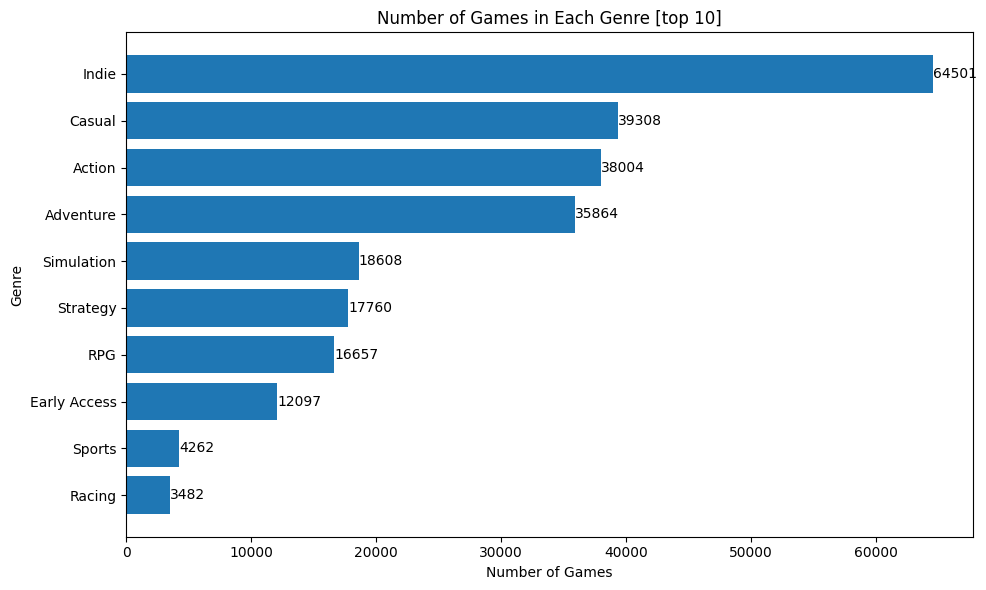

In [77]:
list_genre = [ '360 Video', 'Accounting', 'Action', 'Adventure', 'Animation & Modeling',
       'Audio Production', 'Casual', 'Design & Illustration', 'Documentary',
       'Early Access', 'Education', 'Episodic', 'Free To Play',
       'Game Development', 'Gore', 'Indie', 'Massively Multiplayer', 'Movie',
       'Nudity', 'Photo Editing', 'RPG', 'Racing', 'Sexual Content', 'Short',
       'Simulation', 'Software Training', 'Sports', 'Strategy', 'Tutorial',
       'Utilities', 'Video Production', 'Violent', 'Web Publishing']

n_games_genre = d1[list_genre].sum().sort_values(ascending=True) # Sort ascending for horizontal bars
n_games_genre = n_games_genre.to_frame(name='n_games_genre')
n_games_genre = n_games_genre.tail(10) # Get the top 10
#print(d1.shape[0])

plt.figure(figsize=(10, 6))
plt.barh(n_games_genre.index, n_games_genre['n_games_genre'].values)
plt.xticks(rotation=0)
plt.ylabel("Genre")
plt.xlabel("Number of Games")
plt.title("Number of Games in Each Genre [top 10]")

# Add labels to each bar
for i, v in enumerate(n_games_genre['n_games_genre'].values):
    plt.text(v, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

เมื่อทำการดูแนวโน้มของ genres ในช่วง 10 ปีที่ผ่านมา พบว่า 'Indie' มีจำนวนเกมที่มากที่สุด ซึ่งสอดคล้องกันกับกราฟด้านบน และมีแนวโน้มที่เพิ่มขึ้นเรื่อย ๆ เช่นเดียวกัน

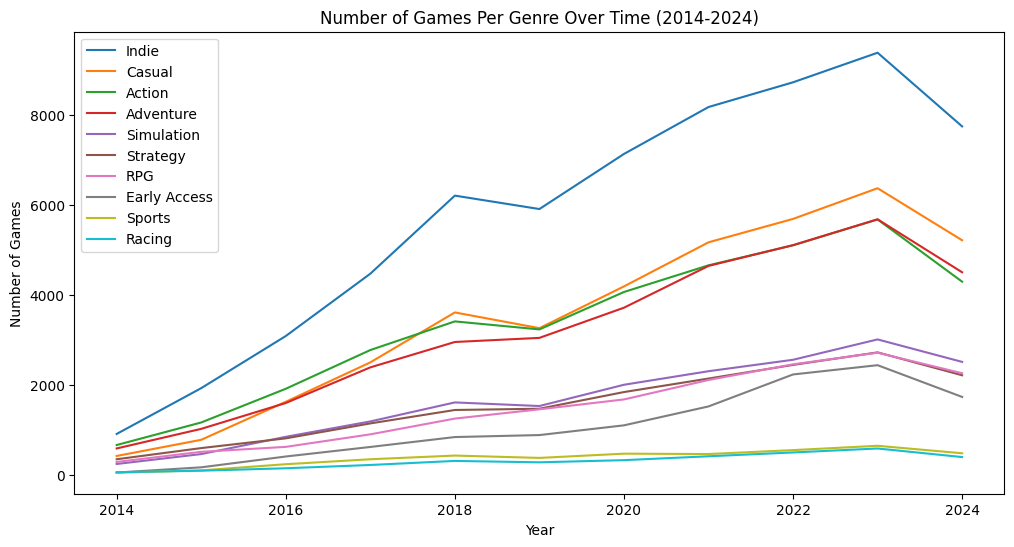

In [78]:
filtered_df = d1[(d1['Year'] >= 2014) & (d1['Year'] <= 2024)]

# Group by year and sum the occurrences of each genre
genre_counts_by_year = filtered_df.groupby('Year')[list_genre].sum()

# Get the top 10 genres
top_10_genres = genre_counts_by_year.sum().sort_values(ascending=False).head(10).index

plt.figure(figsize=(12, 6))
for genre in top_10_genres:
    plt.plot(genre_counts_by_year.index, genre_counts_by_year[genre], label=genre)
plt.xlabel("Year")
plt.ylabel("Number of Games")
plt.title("Number of Games Per Genre Over Time (2014-2024)")
plt.legend(top_10_genres)
plt.show()

เมื่อทำการวิเคราะห์จำนวนการเป็นเจ้าของเกมตาม genre พบว่าแม้ 'Indie' จะมีจำนวนเกมมากที่สุด แต่ยอดซื้อกลับน้อยกว่า 'Action' ซึ่งเป็นหมวดหมู่ที่มีจำนวนการเป็นเจ้าของสูงที่สุด โดยมียอดการซื้อสะสมถึง 4.749 พันล้านครั้ง สวนทางกับจำนวนเกมในหมวด 'Action' ที่อยู่ในอันดับที่ 3 แสดงให้เห็นว่าผู้เล่นมีความชื่นชอบในเกมประเภท 'Action' มากกว่า 'Indie'

In [79]:
# Reshape the DataFrame using melt
melted_df2 = pd.melt(d1,
                    id_vars=['Year', 'owners'],
                    value_vars=list_genre,
                    var_name='Genre',
                    value_name='Value')
# Filter where 'Value' is 1 and group by genres, then sum owners
owner_sum = melted_df2[melted_df2['Value'] == 1].groupby('Genre')['owners'].sum()
owner_sum.sort_values(ascending=False).head(10)

# หน่วยของ owners เป็นพันล้านคน

,owners
Genre,
Action,4.749815e+09
Indie,3.273505e+09
Adventure,2.765970e+09
RPG,1.877345e+09
Strategy,1.449030e+09
Casual,1.356245e+09
Simulation,1.328075e+09
Massively Multiplayer,9.214850e+08
Early Access,5.298050e+08


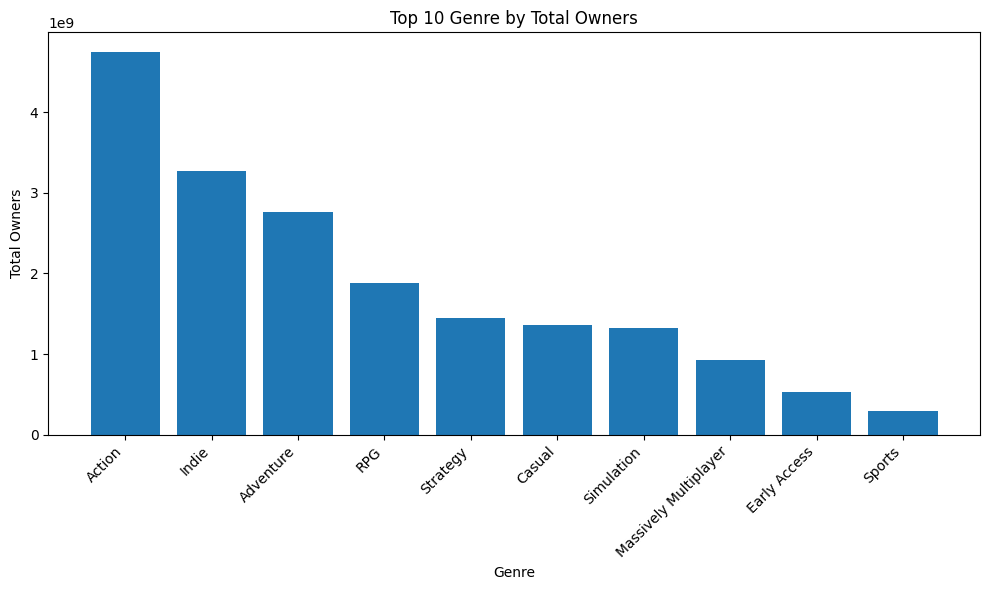

In [80]:
top10_owner_genre = owner_sum.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(top10_owner_genre.index, top10_owner_genre.values)
plt.xlabel("Genre")
plt.ylabel("Total Owners")
plt.title("Top 10 Genre by Total Owners")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **3.3 Playtime**

เวลาเฉลี่ยที่ผู้เล่นใช้ในการเล่นเกมสามารถสะท้อนถึงระดับความสนใจและความชื่นชอบที่ผู้เล่นมีต่อเกมนั้น ๆ ได้เป็นอย่างดี ยิ่งผู้เล่นใช้เวลามากเท่าไร ก็ยิ่งบ่งบอกถึงปฏิสัมพันธ์ระหว่างผู้เล่นกับเกมที่เพิ่มขึ้น ไม่ว่าจะเป็นการสำรวจเนื้อหาในเกม การพัฒนาตัวละคร หรือการเข้าสู่โหมดต่าง ๆ ภายในเกม

In [81]:
d1['diff'] = 2024 - d1['Year']

d1.loc[:,['Year','diff']]
d1['norm'] = d1['Avg_playtime']/d1['diff']

In [82]:
# Filter the DataFrame for the relevant years (2014-2023)
filtered_df = d1[(d1['Year'] >= 2014) & (d1['Year'] <= 2023)]

# Reshape the DataFrame using melt
melted_df = pd.melt(filtered_df,
                    id_vars=['Year', 'norm'],  # Include 'norm' for calculations
                    value_vars=list_category,
                    var_name='Category',
                    value_name='Value')

# Filter where 'Value' is 1 (category present) and group by year and category
category_norm_by_year = melted_df[melted_df['Value'] == 1].groupby(['Year', 'Category'])['norm'].sum().reset_index()
highest_norm_by_year = category_norm_by_year.loc[category_norm_by_year.groupby('Year')['norm'].idxmax()]
highest_norm_by_year.reset_index(drop=True)

,Year,Category,norm
0,2014,Single-player,4.3
1,2015,Single-player,7.0
2,2016,Single-player,9.625
3,2017,Single-player,10.142857
4,2018,Single-player,12.0
5,2019,Single-player,12.0
6,2020,Single-player,15.75
7,2021,Single-player,22.666667
8,2022,Single-player,5.0
9,2023,Single-player,4.0


เมื่อเปรียบเทียบสถิติหมวดหมู่เกม (Category) ย้อนหลัง 10 ปี พบว่าเกมในหมวด Single-player ยังคงครองอันดับหนึ่งมาอย่างต่อเนื่องตั้งแต่ปี 2014 ถึง 2023 โดยในปี 2021 มีเวลาเฉลี่ยในการเล่นเกมสูงกว่าปีอื่น ๆ อย่างเห็นได้ชัด ซึ่งสะท้อนให้เห็นว่าในช่วงเวลาดังกล่าวอาจมีจำนวนเกมในหมวด Single-player ที่เพิ่มมากขึ้น

นอกจากนี้ แนวโน้มเวลาเฉลี่ยที่ใช้ในการเล่นเกมที่เพิ่มมากขึ้นในทุกปี เป็นไปได้ที่น่าจะมีเนื้อเรื่องที่เข้มข้นและน่าติดตามมากยิ่งขึ้น ทำให้ผู้เล่นใช้เวลาเล่นนานกว่าเดิม การเพิ่มขึ้นของเวลาเฉลี่ยจึงอาจเป็นผลมาจากการที่ผู้พัฒนาเกมให้ความสำคัญกับการสร้างเนื้อหาที่ดึงดูดผู้เล่นให้ใช้เวลาอยู่กับเกมนานขึ้น

In [83]:
# Filter the DataFrame for the relevant years (2014-2023)
filtered_df = d1[(d1['Year'] >= 2014) & (d1['Year'] <= 2023)]

# Reshape the DataFrame using melt
melted_df = pd.melt(filtered_df,
                    id_vars=['Year', 'norm'],  # Include 'norm' for calculations
                    value_vars=list_genre,
                    var_name='Genres',
                    value_name='Value')

# Filter where 'Value' is 1 (category present) and group by year and category
genres_norm_by_year = melted_df[melted_df['Value'] == 1].groupby(['Year', 'Genres'])['norm'].sum().reset_index()
highest_norm_by_year = genres_norm_by_year.loc[genres_norm_by_year.groupby('Year')['norm'].idxmax()]
highest_norm_by_year.reset_index(drop=True)

,Year,Genres,norm
0,2014,RPG,2.9
1,2015,Indie,4.888889
2,2016,Adventure,5.875
3,2017,Action,7.142857
4,2018,Simulation,8.5
5,2019,Utilities,14.6
6,2020,Simulation,10.25
7,2021,RPG,16.0
8,2022,Indie,3.5
9,2023,Simulation,4.0


เมื่อลองเปรียบเทียบกับประเภทเกม (Genres) ย้อนหลัง 10 ปี พบว่าเกมในประเภท Indie ครอง 6 ใน 10 ของอันดับ เและมีการเพิ่มขึ้นของเวลาอย่างต่อเนื่องตลอดช่วงปี 2015-2020 ก่อนจะลดลงเล็กน้อยในปี 2022 ขณะที่เกมประเภท Action กลับมาได้รับความนิยมในปี 2023 ส่วนเกม Adventure มีความโดดเด่นในปี 2021 ด้วยเวลาเฉลี่ยสูงสุดที่ 2185 ชั่วโมง

## **3.4 Price**

ในส่วนของราคาเกมบน Steam ได้ทำการดูการกระจายตัวของราคาเกม พบว่าราคาส่วนใหญ่อยู่ในช่วงต่ำกว่า 10 ดอลลาร์ โดยเฉพาะในช่วงราคาที่ต่ำกว่า 5 ดอลลาร์นั้นเป็นช่วงที่มีจำนวนมากที่สุด ซึ่งค่าเฉลี่ยของราคาอยู่ที่ 7.09 ดอลลาร์ แสดงให้เห็นว่าราคาส่วนใหญ่ต่ำกว่าค่าเฉลี่ยนี้ อีกทั้งฮิสโตแกรมมีลักษณะเบ้ขวา (Skewed Right) หมายความว่ามีเกมบางส่วนที่มีราคาสูง แต่ก็มีจำนวนที่น้อยมาก

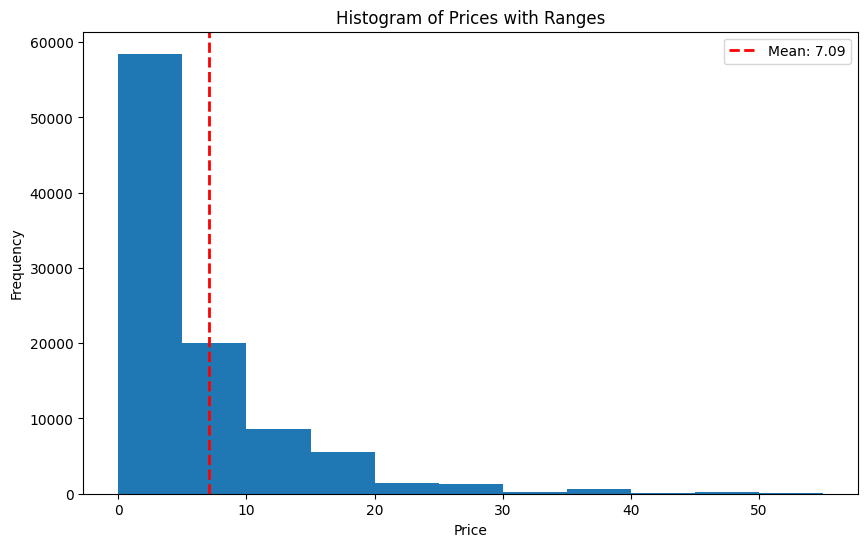

In [84]:
plt.figure(figsize=(10, 6))
plt.hist(d1['Price'], bins=range(0, 60, 5))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices with Ranges')

# Calculate the mean of the 'Price' column
mean_price = d1['Price'].mean()

# Add a vertical line to indicate the mean
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_price:.2f}')
plt.legend()
plt.show()

เมื่อเจาะลึกลงไปตาม genre พบว่า
* เกมประเภท Casual มีจำนวนเกมส่วนมากอยู่ที่ราคาต่ำที่สุด โดยกระจุกตัวอยู่ในช่วงราคาที่ต่ำกว่า 5 ดอลลาร์
* เกมประเภท Action และ Indie มีการกระจายตัวที่กว้างกว่าในช่วงราคา 5 - 20 ดอลลาร์ ซึ่งบ่งบอกว่าเกมในประเภทนี้มีราคาที่หลากหลายกว่าเมื่อเทียบกับ Casual
* เกมในหมวด Adventure และ Simulation
มีความหนาแน่นที่ต่ำกว่าประเภทอื่น ๆ ในช่วงราคา 0 - 10 ดอลลาร์ และมีความหนาแน่นที่กระจายตัวไปจนถึงราคาประมาณ 20 ดอลลาร์ แสดงว่าเกมในหมวดนี้ มีราคาที่สูงขึ้นกว่า เกม Casual, Indie

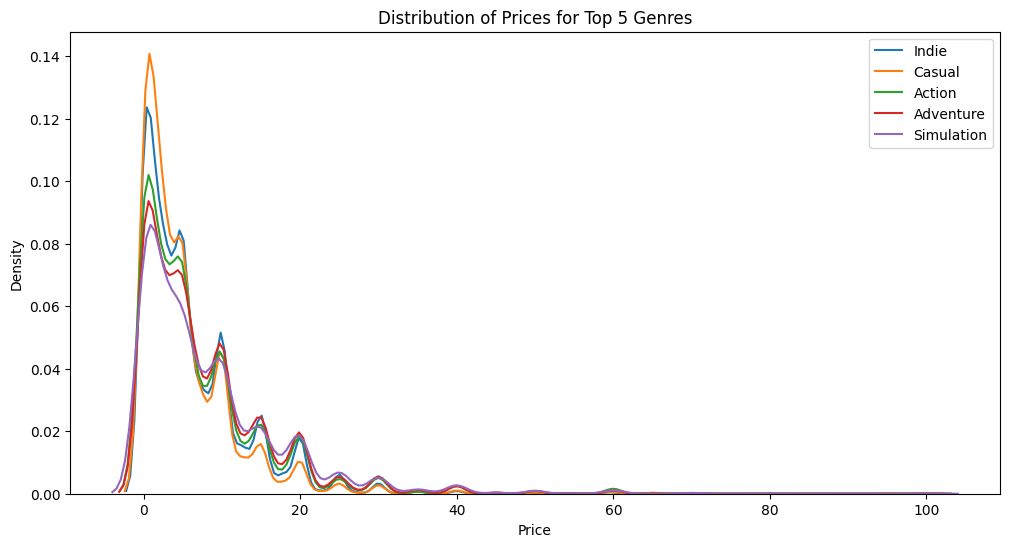

In [85]:
n_games_genre2 = d1[list_genre].sum().sort_values(ascending=False).head(5).index

plt.figure(figsize=(12, 6))
for genre in n_games_genre2:
  subset = d1[(d1[genre] == 1) & (d1['Price'] <= 100)]
  if len(subset) > 0:  # Check if subset is not empty
        sns.kdeplot(subset['Price'], label=genre)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Prices for Top 5 Genres')
plt.legend()
plt.show()

## **3.5 Systems**

ในยุคที่ผู้เล่นเกมมีความหลากหลายของอุปกรณ์ การรองรับหลายระบบปฏิบัติการถือเป็นสิ่งสำคัญสำหรับผู้พัฒนาเกม เพื่อเพิ่มโอกาสในการเข้าถึงผู้เล่นมากขึ้น จึงได้มีการตรวจสอบข้อมูลในส่วนนี้ และพบว่ามีเกมที่รองรับทั้งสามระบบปฏิบัติการเพียง 9,317 เกม ซึ่งคิดเป็นสัดส่วนเพียง 9.56% จากจำนวนเกมทั้งหมด สัดส่วนนี้ถือว่ายังไม่สูงมากนัก และไม่ตรงตามข้อสันนิษฐานที่คาดไว้เกี่ยวกับความนิยมในการรองรับหลายระบบปฏิบัติการในเกม

In [86]:
all_systems_supported = d1[(d1['Windows'] == 1) & (d1['Mac'] == 1) & (d1['Linux'] == 1)]
all_systems_supported.loc[:,['Categories', 'Genres','Windows', 'Mac', 'Linux']]

,Categories,Genres,Windows,Mac,Linux
Name,,,,,
Henosis™,"Single-player,Full controller support","Adventure,Casual,Indie",True,True,True
Deadlings: Rotten Edition,"Single-player,Steam Achievements,Steam Trading...","Action,Adventure,Indie",True,True,True
Royal Battleships,"Single-player,Steam Achievements,Steam Leaderb...","Casual,Indie",True,True,True
Hero of the Kingdom II,"Single-player,Steam Achievements,Steam Trading...","Adventure,Casual,Indie,RPG",True,True,True
Steam Squad,"Single-player,Multi-player,PvP,Shared/Split Sc...","Indie,Strategy",True,True,True
...,...,...,...,...,...
WaggaSim,"Single-player,Family Sharing","Indie,Simulation,Sports,Early Access",True,True,True
3D PUZZLE - Bedroom,"Single-player,Steam Achievements,Steam Leaderb...","Action,Casual,Indie",True,True,True
Seeds,"Single-player,Steam Cloud","Casual,Free To Play",True,True,True


เมื่อวิเคราะห์ผู้พัฒนาที่ผลิตเกมรองรับทั้งสามระบบปฏิบัติการ พบว่า Choice of Games ครองอันดับสูงสุด ด้วยจำนวนเกมที่รองรับทั้งสามระบบถึง 159 เกม ซึ่งมากกว่าอันดับที่สองอย่าง Hosted Games ถึง 34.59% ข้อมูลนี้อาจบ่งชี้ว่า Choice of Games เป็นผู้พัฒนาที่มีเงินทุนสูงหรือมีจำนวนทีมงานที่มาก

In [87]:
#(3 systems), count top 10 developers

developer_counts = all_systems_supported['Developers'].value_counts()
developer_counts.head(10)


,count
Developers,
Choice of Games,159
Hosted Games,104
EroticGamesClub,88
Hede,50
SEGA,46
Miel,46
Top-Down Games,43
For Kids,36
Humongous Entertainment,33


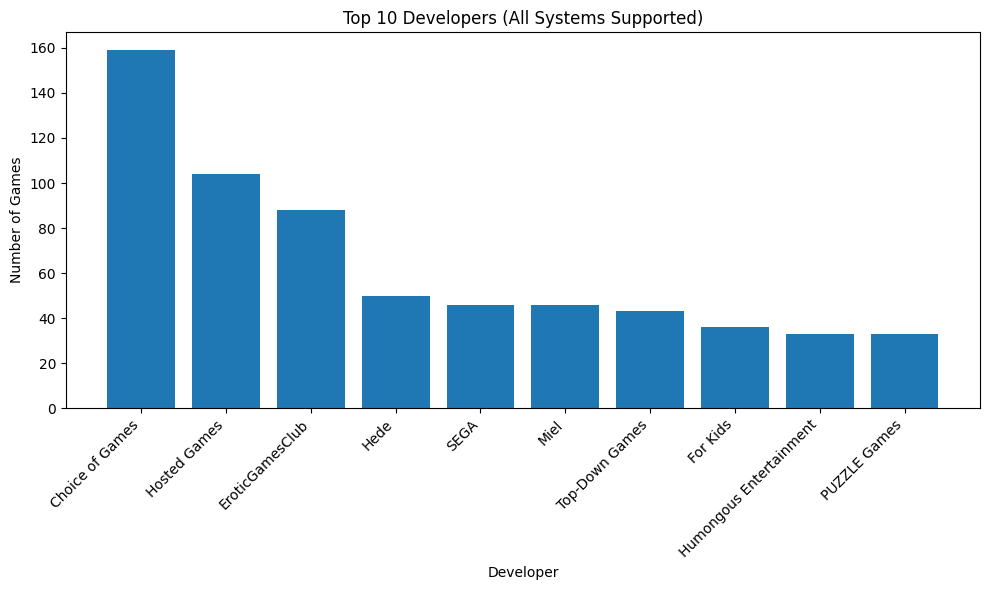

In [88]:
developer_counts = all_systems_supported['Developers'].value_counts()
top10_developers = developer_counts.head(10)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(top10_developers.index, top10_developers.values)
plt.xlabel("Developer")
plt.ylabel("Number of Games")
plt.title("Top 10 Developers (All Systems Supported)")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

เมื่อวิเคราะห์ผู้จัดจำหน่ายที่ผลิตเกมรองรับทั้งสามระบบปฏิบัติการ พบว่า Choice of Games ครองอันดับสูงสุด ด้วยจำนวนเกมที่รองรับทั้งสามระบบถึง 159 เกม ซึ่งมากกว่าอันดับที่สองอย่าง Hede ถึง 21.38% ข้อมูลนี้สอดคล้องกับการวิเคราะห์ผู้พัฒนาที่ผลิตเกมรองรับทั้งสามระบบปฏิบัติการ โดยชี้ให้เห็นว่าเกมจาก Choice of Games มีแนวโน้มสูงที่จะออกเกมใหม่ที่สามารถรองรับทั้งสามระบบปฏิบัติการได้อย่างต่อเนื่อง

In [89]:
#(3 systems), count top 10 publishers

publisher_counts = all_systems_supported['Publishers'].value_counts()
publisher_counts.head(10)

,count
Publishers,
Choice of Games,159
Hede,125
Hosted Games,104
EroticGamesClub,88
unknown,84
Artifex Mundi,79
Cherry Kiss Games,64
SEGA,62
Hentai works,46


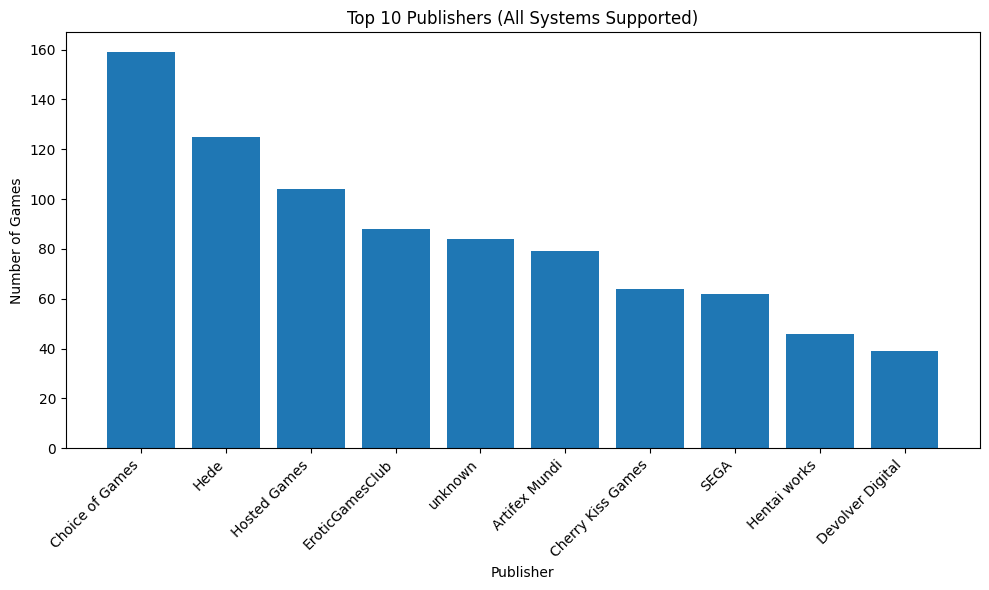

In [90]:
publisher_counts = all_systems_supported['Publishers'].value_counts()
top10_publishers = publisher_counts.head(10)

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(top10_publishers.index, top10_publishers.values)
plt.xlabel("Publisher")
plt.ylabel("Number of Games")
plt.title("Top 10 Publishers (All Systems Supported)")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## **3.6 Developer and Publisher**

จากการสำรวจข้อมูล พบว่า Developer และ Publisher แต่ละรายมีจำนวนการซื้อเกมที่แตกต่างกัน ซึ่งสะท้อนให้เห็นถึงความหลากหลายของตลาดเกมและความชอบที่แตกต่างกันของผู้เล่นในแต่ละประเภทเกม

In [91]:
def convert_range_to_midpoint(value):
    try:
        # Attempt to convert directly to float if already numeric
        return float(value)
    except ValueError:
        # If ValueError, assume it's a range and calculate midpoint
        if isinstance(value, str) and '-' in value:
            min_val, max_val = map(float, value.split('-'))
            return (min_val + max_val) / 2
        else:
            # If not a recognizable range, return NaN
            return float('nan')

# Apply the conversion to 'owners' columns
d1['owners'] = d1['owners'].apply(convert_range_to_midpoint)

owner_dev = d1.loc[:,['Year', 'owners', 'Developers', 'Publishers']].sort_values(by=['owners'], ascending=False)

# Group by 'Developers' and sum 'owners'
owner_by_dev = owner_dev.groupby('Developers')['owners'].sum()

# Group by 'Publishers' and sum 'owners'
owner_by_pub = owner_dev.groupby('Publishers')['owners'].sum()

In [92]:
owner_by_dev.sort_values(ascending=False).head(10)

,owners
Developers,
Valve,498070000.0
Game Science,76500000.0
"KRAFTON, Inc.",75825000.0
"Valve,Hidden Path Entertainment",75000000.0
Amazon Games,75000000.0
Facepunch Studios,70120000.0
Ubisoft Montreal,54445000.0
"CAPCOM Co., Ltd.",52960000.0
Bethesda Game Studios,49750000.0


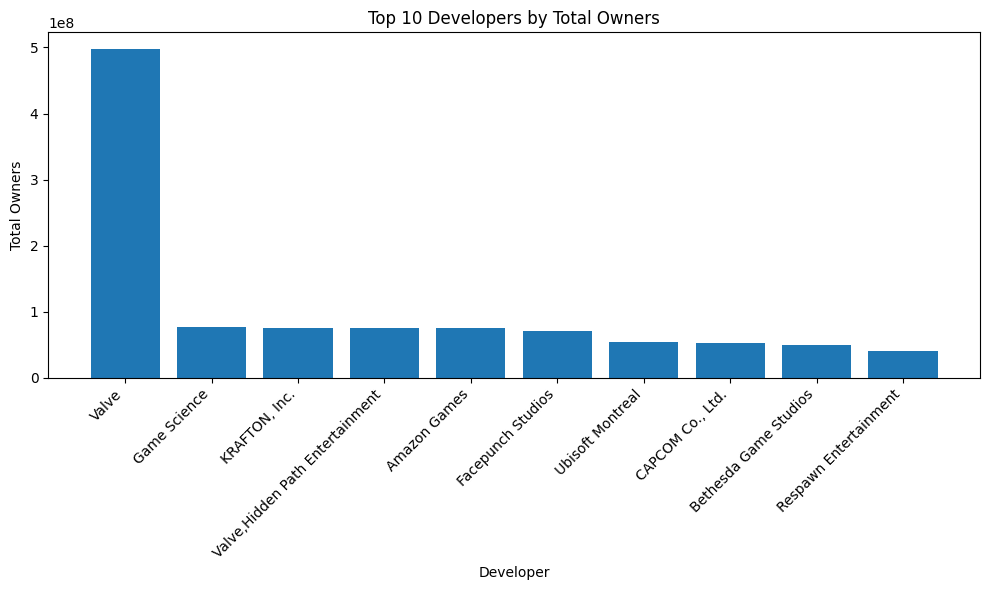

In [93]:
top10_devs = owner_by_dev.sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top10_devs.index, top10_devs.values)
plt.xlabel("Developer")
plt.ylabel("Total Owners")
plt.title("Top 10 Developers by Total Owners")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

จากกราฟจะเห็นได้ว่า จำนวนการซื้อเกมของ Valve มีจำนวนที่มากที่สุด โดยมีสัดส่วนจำนวนการซื้อเกมมากกว่า 9 ลำดับที่เหลืออย่างเห็นได้ชัด โดยมีสัดส่วนมากกว่าลำดับที่ 2 อย่าง Game Science ถึง 6.51 เท่า

In [94]:
owner_by_pub.sort_values(ascending=False).head(10)

,owners
Publishers,
Valve,629870000.0
Ubisoft,167045000.0
Electronic Arts,151110000.0
Bethesda Softworks,115130000.0
Amazon Games,110000000.0
Xbox Game Studios,105900000.0
2K,89725000.0
SEGA,87095000.0
"KRAFTON, Inc.",76585000.0


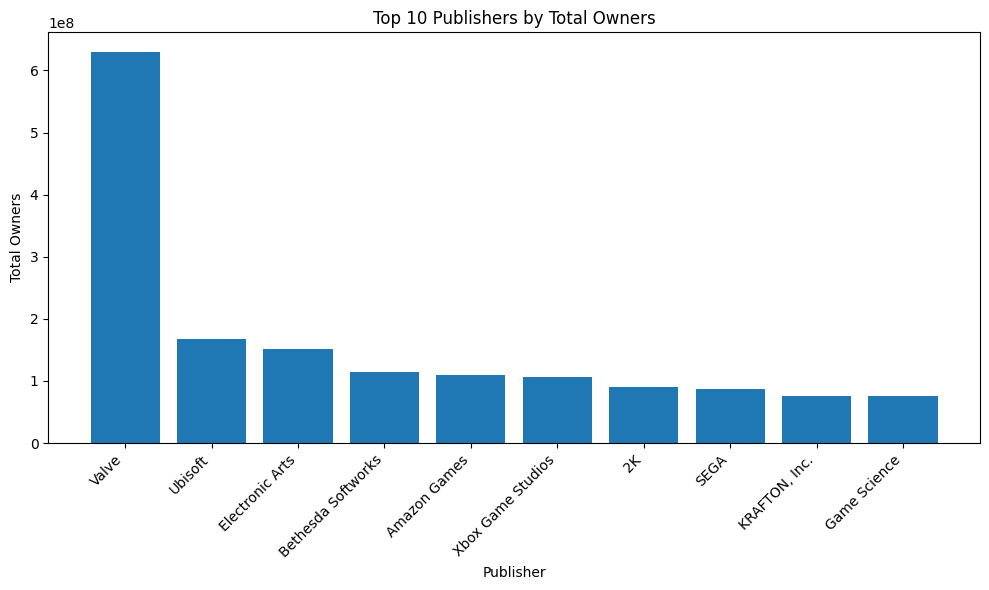

In [95]:
top10_pubs = owner_by_pub.sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top10_pubs.index, top10_pubs.values)
plt.xlabel("Publisher")
plt.ylabel("Total Owners")
plt.title("Top 10 Publishers by Total Owners")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

จะเห็นได้ว่า ไม่ว่าจะเป็นผู้พัฒนา หรือผู้จัดจำหน่าย Valve ก็มีการขายเกมในจำนวนที่มากกว่าทุก ๆ เจ้า เมื่อลองทำการเจาะลึกลงไปจึงพบว่า Valve เป็นค่ายเกมที่ผลิตเกม อย่าง Counter-Strike ออกมา ซึ่งเกมนี้ที่เป็นที่นิยมเป็นอย่างมาก จึงทำให้ Valve ครองอันดับแรกของทั้ง 2 หัวข้อนี้ไปได้



---



# **4. Insight Analysis**

จากการสำรวจและวิเคราะห์ข้อมูลข้างต้น ทำให้เห็นถึงแนวโน้มของตลาดบนแพลตฟอร์ม Steam ว่าเป็นอย่างไร จึงเกิดข้อสงสัยว่าอะไรคือปัจจัยที่ส่งผลต่อการเลือกซื้อเกมบนแพลตฟอร์ม Steam

## **4.1 Correlation**

โดยคอลัมน์ที่เลือกในการดูความสัมพันธ์ ได้แก่ คอลัมน์ 'Price', 'Avg_playtime', 'Positive', 'Negative', 'Windows', 'Mac', 'Linux' และ 'owners'

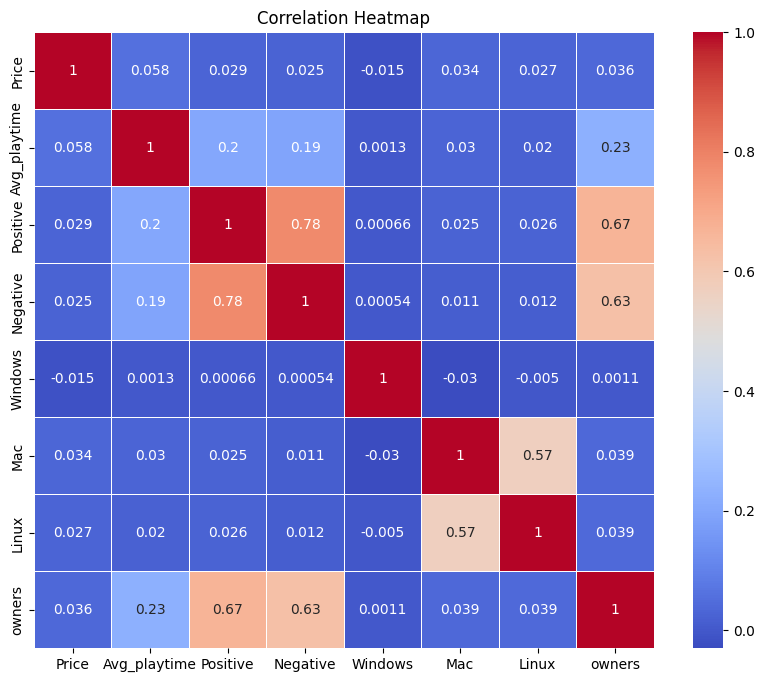

In [40]:
# เลือกคอลัมน์ที่ต้องการดูความสัมพันธ์
cols = ['Price', 'Avg_playtime', 'Positive', 'Negative', 'Windows', 'Mac', 'Linux', 'owners']

# Convert 'Price' and 'owners' columns to numeric if they contain ranges
# Assuming the ranges are in the format 'min - max'
def convert_range_to_midpoint(value):
    try:
        # Attempt to convert directly to float if already numeric
        return float(value)
    except ValueError:
        # If ValueError, assume it's a range and calculate midpoint
        if isinstance(value, str) and '-' in value:
            min_val, max_val = map(float, value.split('-'))
            return (min_val + max_val) / 2
        else:
            # If not a recognizable range, return NaN
            return float('nan')

# Apply the conversion to 'Price' and 'owners' columns
d1['Price'] = d1['Price'].apply(convert_range_to_midpoint)
d1['owners'] = d1['owners'].apply(convert_range_to_midpoint)


# สร้าง correlation matrix
corr_matrix = d1[cols].corr()

# วาด heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

จากกราฟ Correlation Heatmap แสดงให้เห็นถึงความสัมพันธ์ระหว่างตัวแปรต่าง ๆ  โดยพบว่าความสัมพันธ์ของรีวิวเชิงบวกและเชิงลบมีความสัมพันธ์กันเป็นอย่างมาก ซึ่งมีค่า Correlation สูงถึง 0.78 แสดงว่าผู้เล่นที่ให้รีวิวดีมักจะมีรีวิวไม่ดีในบางกรณี

นอกจากนี้รีวิวเชิงบวกและลบยังมีความสัมพันธ์สูงกับ จำนวนผู้ใช้งาน (Owners) ที่ 0.67 และ 0.63 ตามลำดับ ซึ่งแสดงให้เห็นว่าจำนวนรีวิวมีผลต่อการเพิ่มจำนวนผู้เล่น จึงได้ข้อสงสัยว่าลักษณะเกมแบบไหนที่มักจะได้รับรีวิวเชิงบวกและลบ

## **4.2 Positive and Negative**

*Correlation heatmap* แสดงให้เห็นว่า คอลัมน์ 'Positive' และ 'Negative' มี positive correlation ร่วมกันที่ 0.78 จึงทำการ sort ข้อมูลและเลือกเกมที่มีคะแนน Positive อันดับแรกคือ CSGO มาเพื่อ ดึงข้อมูลรีวิวของเกมเพิ่มเติม

In [41]:
#sort ด้วย column 'Positive' เพื่อดู 10 อันดับแรก
d1.loc[:,['Genres', 'Positive', 'Negative','Release_date', 'Year']].sort_values(by=['Positive'],ascending = [False]).head(10)

,Genres,Positive,Negative,Release_date,Year
Name,,,,,
Counter-Strike: Global Offensive,"Action,Free to Play",5764420,766677,2012-08-21,2012
Dota 2,"Action,Free to Play,Strategy",1477153,300437,2013-07-09,2013
Grand Theft Auto V,"Action,Adventure",1171197,210154,2015-04-13,2015
PUBG: BATTLEGROUNDS,"Action,Adventure,Free to Play,Massively Multip...",1154655,895978,2017-12-21,2017
Terraria,"Action,Adventure,Indie,RPG",964983,21044,2011-05-16,2011
Tom Clancy's Rainbow Six® Siege,Action,929372,138530,2015-12-01,2015
Team Fortress 2,"Action,Free to Play",823693,56683,2007-10-10,2007
Garry's Mod,"Indie,Simulation",822326,29004,2006-11-29,2006
Rust,"Action,Adventure,Indie,Massively Multiplayer,RPG",703687,108223,2018-02-08,2018


In [42]:
#sort ด้วย Negative column พบว่าเกม 9/10 อันดับแรก มาจาก Action genre
d1.loc[:,['Genres', 'Positive', 'Negative','Release_date', 'Year']].sort_values(by=['Negative'],ascending = [False]).head(10)

,Genres,Positive,Negative,Release_date,Year
Name,,,,,
PUBG: BATTLEGROUNDS,"Action,Adventure,Free to Play,Massively Multip...",1154655,895978,2017-12-21,2017
Counter-Strike: Global Offensive,"Action,Free to Play",5764420,766677,2012-08-21,2012
Dota 2,"Action,Free to Play,Strategy",1477153,300437,2013-07-09,2013
Grand Theft Auto V,"Action,Adventure",1171197,210154,2015-04-13,2015
Tom Clancy's Rainbow Six® Siege,Action,929372,138530,2015-12-01,2015
Cyberpunk 2077,RPG,391643,129925,2020-12-09,2020
Dead by Daylight,Action,494648,112924,2016-06-14,2016
Rust,"Action,Adventure,Indie,Massively Multiplayer,RPG",703687,108223,2018-02-08,2018
Battlefield™ 2042,"Action,Adventure,Casual",39121,106038,2021-11-19,2021


เกมยอดนิยมส่วนใหญ่เป็นแนว Action และ Adventure โดย Counter-Strike: Global Offensive มีรีวิวเชิงบวกสูงสุดถึง 5.76 ล้านรีวิว ในขณะเดียวกันเมื่อดูตามรีวิวเชิงลบกลับพบว่า Counter-Strike ได้อันดับที่ 2 ของเกมที่มีรีวิวเชิงลบมากที่สุดเช่นกัน และเกม 9 อันดับแรก มาจาก Action genre

In [43]:
# Action genre มีจำนวน Negative สูง แล้วมี owners สูงด้วยหรือไม่ ในช่วง 10 ปี

filtered_df = d1[(d1['Year'] >= 2014) & (d1['Year'] <= 2024)]
top5_byowners = filtered_df.sort_values(by=['owners'], ascending=False).head(5)
top5_byowners.loc[:,['Release_date', 'owners', 'Categories', 'Genres']]

,Release_date,owners,Categories,Genres
Name,,,,
PUBG: BATTLEGROUNDS,2017-12-21,75000000.0,"Multi-player,PvP,Online PvP,Stats,Remote Play ...","Action,Adventure,Free to Play,Massively Multip..."
New World,2021-09-28,75000000.0,"Multi-player,MMO,PvP,Online PvP,Co-op,Online C...","Action,Adventure,Massively Multiplayer,RPG"
Black Myth: Wukong,2024-08-19,75000000.0,"Single-player,Steam Achievements,Full controll...","Action,Adventure,RPG"
Tom Clancy's Rainbow Six® Siege,2015-12-01,35000000.0,"Single-player,Multi-player,PvP,Online PvP,Co-o...",Action
Among Us,2018-11-16,35000000.0,"Multi-player,PvP,Online PvP,LAN PvP,Co-op,Onli...",Casual


จาก correlation heatmap ที่แสดงถึงความสัมพันธ์เชิงบวกระหว่างจำนวนผู้เล่น (owners) และรีวิวเชิงลบ (Negative column) ทำให้เกิดคำถามว่า ทำไมจำนวนผู้เล่นที่เพิ่มขึ้นถึงสัมพันธ์กับรีวิวเชิงลบ? เมื่อเจาะลึกไปที่เกมประเภท Action ซึ่งมีรีวิวเชิงลบสูงอย่าง PUBG: Battlegrounds และ Tom Clancy's Rainbow Six Siege ที่อยู่ใน top 5 ของเกมที่มีผู้เล่นมากที่สุดในช่วง 10 ปี มีส่วนทำให้เกิดความสัมพันธ์นี้หรือไม่? หรือเป็นไปได้ว่า เมื่อมีผู้เล่นมากขึ้น การคาดหวังหรือประสบการณ์ของผู้เล่นนั้นเปลี่ยนไป ส่งผลให้เกิดการวิจารณ์ในด้านลบมากขึ้น?

ได้ทำการ scrape ข้อมูลรีวิวโดยใช้
credit : **https://apify.com/**

In [44]:
#https://store.steampowered.com/app/730/CounterStrike_2/
#url ='https://raw.githubusercontent.com/PhimWi/Steam-mini-project/main/csgo_english.csv'


csgo_english = pd.read_csv('https://raw.githubusercontent.com/PhimWi/Steam-mini-project/main/csgo_english.csv')

!pip install textblob
from textblob import TextBlob

def get_sentiment(text):
    text = str(text)
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

csgo_english['sentiment'] = csgo_english['review'].apply(get_sentiment)

**ตัวอย่าง รีวิวฝั่งที่เป็น Negative และ Positive**

In [45]:
# Negative Reviews
negative_reviews = csgo_english[csgo_english['sentiment'] < 0]
negative_reviews.loc[:, ['review', 'sentiment']].sort_values(by = 'sentiment', ascending = False).reset_index(drop = True)

,review,sentiment
0,Downloading Content (0%) in match nice i got t...,-1.850372e-17
1,this game is very fun,-5.000000e-03
2,very bad game gives me random VAC ban my pure ...,-8.738095e-03
3,fuck this game still love it but I hate it but...,-1.333333e-02
4,"CS GO was better than this, VALVE had no fucki...",-1.428571e-02
...,...,...
363,i hate terrorists,-8.000000e-01
364,"Toxic point and click.\nI hate it, yet I keep ...",-8.000000e-01
365,if u sleepy play this game then boom u die!!!!,-9.765625e-01
366,"absolutely horrible, why do people still ""play...",-1.000000e+00


In [46]:
# Positive Reviews
positive_reviews = csgo_english[csgo_english['sentiment'] > 0]
positive_reviews.loc[:, ['review', 'sentiment']].sort_values(by = 'sentiment', ascending = False).reset_index(drop = True)

,review,sentiment
0,best fps ever,1.000000e+00
1,<3,1.000000e+00
2,best competitive shooter that you can play,1.000000e+00
3,"The best FPS in the world, bar none.",1.000000e+00
4,excellent ame,1.000000e+00
...,...,...
593,"Decent game, could use some balance when it co...",8.333333e-03
594,its hard but fun,4.166667e-03
595,ah yes CS2 the 2nd most neglected VALVE game w...,2.272727e-03
596,"As Counter-Strike fan, CS2 has been a letdown....",1.160038e-03


In [47]:
def categorize_sentiment(sentiment):
    if sentiment < 0:
        return 'negative'
    elif sentiment > 0:
        return 'positive'
    else:
        return 'neutral'

csgo_english['sentiment_category'] = csgo_english['sentiment'].apply(categorize_sentiment)

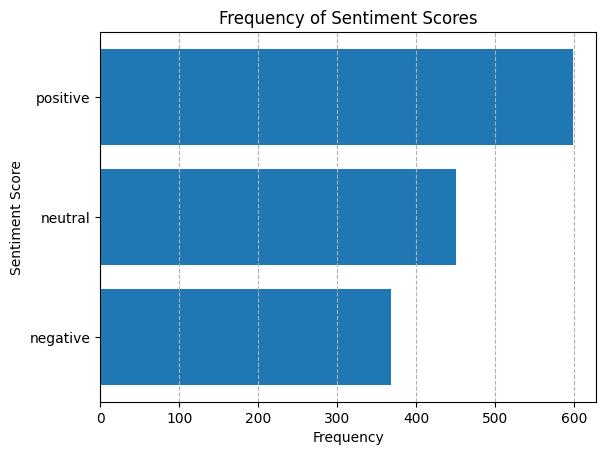

In [48]:
sentiment_counts = csgo_english['sentiment_category'].value_counts().sort_index()
plt.barh(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Frequency')
plt.ylabel('Sentiment Score')
plt.title('Frequency of Sentiment Scores')
plt.grid(axis='x', linestyle='--')
plt.show()

เมื่อนำตัวอย่างความคิดเห็นมาดู พบว่าคะแนนออกไปทาง Positive

## **4.3 SHAP Positive vs. Negative Sentiment Classification**

เนื่องจากการดึงข้อมูลข้างต้นยังไม่สามารถแสดงภาพที่ชัดเจนได้ จึงได้นำ SHAP มาใช้ในการวิเคราะห์เชิงอารมณ์ (Sentiment Analysis) เพื่อทำความเข้าใจเชิงลึกเกี่ยวกับความรู้สึกของผู้เล่นต่อเกมในแต่ละหมวดหมู่ โดย SHAP จะช่วยให้เรามองเห็นปัจจัยต่าง ๆ ที่ส่งผลต่อความชอบและความพึงพอใจของผู้เล่นอย่างชัดเจนมากยิ่งขึ้น

credit : https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/sentiment_analysis/Positive%20vs.%20Negative%20Sentiment%20Classification.html#Load-the-IMDB-movie-review-dataset

In [49]:
!pip install datasets
from datasets import load_dataset

!pip install shap
!pip install transformers
import transformers
import shap

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
dataset = load_dataset("csv", data_files="https://raw.githubusercontent.com/PhimWi/Steam-mini-project/main/csgo_english.csv", split="train")
short_data = [v[:500] for v in dataset["review"][:60]]
classifier = transformers.pipeline("sentiment-analysis", return_all_scores=True)
#classifier(short_data[:2])


**คำที่ไฮไลท์สีฟ้า เป็นคำที่ SHAP วิเคราะห์ว่าเป็น Negative**

In [97]:
explainer = shap.Explainer(classifier)
shap_values = explainer(short_data[:2])
shap.plots.text(shap_values[:, :, "POSITIVE"])

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [03:48, 114.38s/it]


In [98]:
shap_values = explainer(short_data[:40])

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:   2%|▎         | 1/40 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  12%|█▎        | 5/40 [03:29<14:45, 25.29s/it]

  0%|          | 0/462 [00:00<?, ?it/s]

PartitionExplainer explainer:  18%|█▊        | 7/40 [04:07<10:57, 19.93s/it]

  0%|          | 0/110 [00:00<?, ?it/s]

PartitionExplainer explainer:  20%|██        | 8/40 [04:13<08:18, 15.57s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  28%|██▊       | 11/40 [06:46<13:42, 28.37s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  32%|███▎      | 13/40 [07:42<11:37, 25.84s/it]

  0%|          | 0/90 [00:00<?, ?it/s]

PartitionExplainer explainer:  35%|███▌      | 14/40 [07:50<08:52, 20.47s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  40%|████      | 16/40 [08:40<08:15, 20.63s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  42%|████▎     | 17/40 [09:48<13:19, 34.78s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  45%|████▌     | 18/40 [11:07<17:41, 48.24s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  48%|████▊     | 19/40 [13:57<29:37, 84.64s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  62%|██████▎   | 25/40 [16:13<04:16, 17.10s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  68%|██████▊   | 27/40 [17:03<04:06, 18.96s/it]

  0%|          | 0/306 [00:00<?, ?it/s]

PartitionExplainer explainer:  72%|███████▎  | 29/40 [17:27<02:40, 14.57s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  82%|████████▎ | 33/40 [18:03<00:54,  7.80s/it]

  0%|          | 0/110 [00:00<?, ?it/s]

PartitionExplainer explainer:  88%|████████▊ | 35/40 [18:13<00:30,  6.14s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  90%|█████████ | 36/40 [18:58<01:11, 17.90s/it]

  0%|          | 0/210 [00:00<?, ?it/s]

PartitionExplainer explainer:  92%|█████████▎| 37/40 [19:17<00:54, 18.03s/it]

  0%|          | 0/342 [00:00<?, ?it/s]

PartitionExplainer explainer:  98%|█████████▊| 39/40 [19:45<00:15, 15.04s/it]

  0%|          | 0/156 [00:00<?, ?it/s]

PartitionExplainer explainer: 41it [19:57, 29.95s/it]


**พบว่าใน review ที่เป็น Positive มักจะมีคำที่พบได้บ่อยดังนี้**

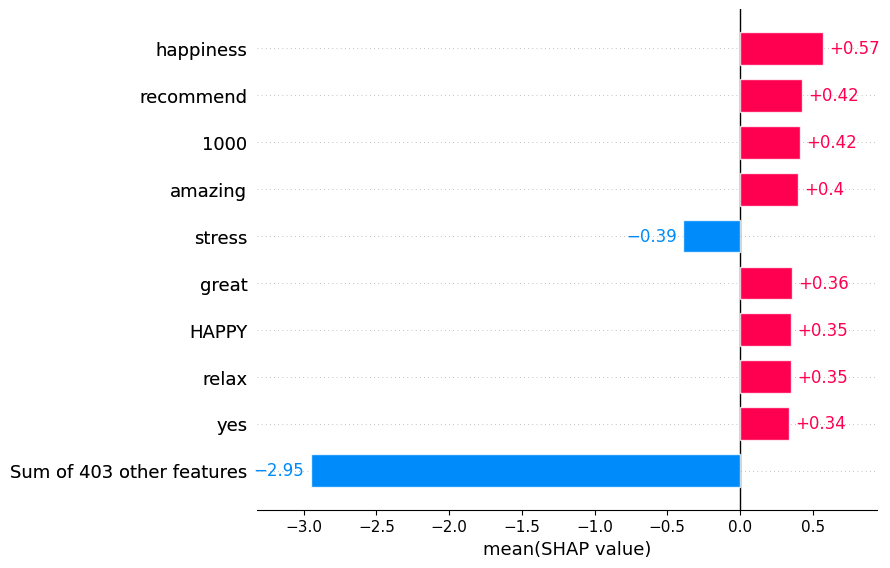

In [99]:
shap.plots.bar(shap_values[:, :, "POSITIVE"].mean(0))

# **5. Summary**

สุดท้ายนี้จากการวิเคราะห์ข้อมูลทั้งหมดสามารถสรุปได้ว่า ปัจจัยที่ทำให้เกมได้รับความนิยมมีหลายด้าน เช่น ความหลากหลายของประเภทเกม เวลาเล่น และราคา ในขณะที่ปัจจัยที่ทำให้เกมไม่เป็นที่นิยมส่วนใหญ่จะเกี่ยวข้องกับจำนวนผู้เล่นและความคาดหวังที่สูงขึ้นของผู้ใช้ ทำให้เกิดข้อเสนอแนะแนวทางในการพัฒนาเกมให้ตอบสนองความต้องการและความคาดหวังของผู้เล่นได้ดียิ่งขึ้นในอนาคต

ดังนั้นการเข้าใจพฤติกรรมและความต้องการของผู้เล่นเป็นสิ่งสำคัญที่สามารถช่วยให้ทั้งผู้พัฒนาและผู้เล่นได้ประโยชน์จากการมีส่วนร่วมในตลาดเกมอย่างมีประสิทธิภาพ นอกจากนี้ การมีส่วนร่วมในการสร้างเนื้อหาและฟีเจอร์ใหม่ๆ จะช่วยให้วงการเกมพัฒนาไปในทิศทางที่ดีขึ้นต่อไปในอนาคต

